### 자동미분

In [15]:
import tensorflow as tf

w = tf.Variable(2.)

def f(w):
    y = w**2
    z = 2*y + 5
    return z

In [16]:
with tf.GradientTape() as tape:
    z = f(w)
    
gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


### 자동 미분을 이용한 선형 회귀 구현

In [18]:
# 학습될 가중치 변수를 선언

w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [19]:
# 가설을 함수로서 정의

@tf.function
def hypothesis(x):
    return w*x + b

In [20]:
# 현재의 가설에서 w와 b는 각각 4와 1이므로 임의의 입력값을 넣었을 때의 결과

X_test = [3.5, 5, 5.5, 6]
print(hypothesis(X_test).numpy())

[15. 21. 23. 25.]


In [21]:
# 평균 제곱 오차를 손실 함수로서 정의

@tf.function
def mse_loss(y_pred, y):
    # 두 개의 차이값을 제곱을 해서 평균을 취함
    return tf.reduce_mean(tf.square(y_pred - y))

In [22]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 학습 데이터
y = [11, 22, 33, 44, 55, 66, 77, 87, 95] # 학습 데이터에 맵핑되는 성적

In [24]:
# 옵티마이저(경사하강법, 학습률은 0.01로 사용)

optimizer = tf.optimizers.SGD(0.01)

In [25]:
# 경사하강법 수행

for i in range(301):
    with tf.GradientTape() as tape:
        # 현재 파라미터에 기반한 입력 X에 대한 예측값을 y_pred
        y_pred = hypothesis(X)
        
        # 평균 제곱 오차를 계산
        cost = mse_loss(y_pred, y)
        
    # 손실 함수에 대한 파라미터의 미분값 계산
    gradients = tape.gradient(cost, [w, b])
    
    # 파라미터 업데이트
    optimizer.apply_gradients(zip(gradients, [w, b]))
    
    if i % 10 == 0:
        print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4f} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2356 | b의 값 : 1.6689 | cost : 1417.222168
epoch :  10 | w의 값 : 10.5300 | b의 값 : 1.9920 | cost : 1.109114
epoch :  20 | w의 값 : 10.5363 | b의 값 : 1.9531 | cost : 1.093517
epoch :  30 | w의 값 : 10.5422 | b의 값 : 1.9158 | cost : 1.079150
epoch :  40 | w의 값 : 10.5479 | b의 값 : 1.8800 | cost : 1.065920
epoch :  50 | w의 값 : 10.5534 | b의 값 : 1.8456 | cost : 1.053737
epoch :  60 | w의 값 : 10.5586 | b의 값 : 1.8127 | cost : 1.042517
epoch :  70 | w의 값 : 10.5636 | b의 값 : 1.7810 | cost : 1.032181
epoch :  80 | w의 값 : 10.5685 | b의 값 : 1.7506 | cost : 1.022660
epoch :  90 | w의 값 : 10.5731 | b의 값 : 1.7215 | cost : 1.013896
epoch : 100 | w의 값 : 10.5775 | b의 값 : 1.6935 | cost : 1.005822
epoch : 110 | w의 값 : 10.5818 | b의 값 : 1.6667 | cost : 0.998384
epoch : 120 | w의 값 : 10.5859 | b의 값 : 1.6409 | cost : 0.991538
epoch : 130 | w의 값 : 10.5898 | b의 값 : 1.6162 | cost : 0.985230
epoch : 140 | w의 값 : 10.5936 | b의 값 : 1.5925 | cost : 0.979426
epoch : 150 | w의 값 : 10.5972 | b의 값 : 1.5697 | cost :

- w와 b의 값이 계속 업데이트 됨에 따라서 cost가 지속적으로 줄어드는 것을 확인. 학습된 w와 b의 값에 대해서 임의 입력을 넣었을 경우의 예측값을 확인

In [26]:
X_test = [3.5, 5, 5.5, 6]
print(hypothesis(X_test).numpy())

[38.54915 54.50447 59.82291 65.14135]


### 케라스로 구현하는 선형 회귀

In [27]:
# 옵티마이저 : 경사하강법, 학습률 : 0.01, 손실 함수 : 평균 제곱 오차, epoch : 300

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

X = [1, 2, 3, 4, 5, 6, 7, 8, 9]
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]

model = Sequential()

model.add(Dense(1, input_dim = 1, activation = 'linear'))

sgd = optimizers.SGD(lr = 0.01)

model.compile(optimizer = sgd, loss = 'mse', metrics = ['mse'])

model.fit(X, y, epochs = 300)

Epoch 1/300
1/1 [==============================] - 0s 256ms/step - loss: 2785.5674 - mse: 2785.5674
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 343.7495 - mse: 343.7495
Epoch 3/300
1/1 [==============================] - 0s 4ms/step - loss: 43.3015 - mse: 43.3015
Epoch 4/300
1/1 [==============================] - 0s 5ms/step - loss: 6.3330 - mse: 6.3330
Epoch 5/300
1/1 [==============================] - 0s 4ms/step - loss: 1.7837 - mse: 1.7837
Epoch 6/300
1/1 [==============================] - 0s 5ms/step - loss: 1.2233 - mse: 1.2233
Epoch 7/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1537 - mse: 1.1537
Epoch 8/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1446 - mse: 1.1446
Epoch 9/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1428 - mse: 1.1428
Epoch 10/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1420 - mse: 1.1420
Epoch 11/300
1/1 [==============================] - 0s 4ms/step -

1/1 [==============================] - 0s 4ms/step - loss: 1.1027 - mse: 1.1027
Epoch 90/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1024 - mse: 1.1024
Epoch 91/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1020 - mse: 1.1020
Epoch 92/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1017 - mse: 1.1017
Epoch 93/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1013 - mse: 1.1013
Epoch 94/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1010 - mse: 1.1010
Epoch 95/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1007 - mse: 1.1007
Epoch 96/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1003 - mse: 1.1003
Epoch 97/300
1/1 [==============================] - 0s 5ms/step - loss: 1.1000 - mse: 1.1000
Epoch 98/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0997 - mse: 1.0997
Epoch 99/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0994 - ms

1/1 [==============================] - 0s 6ms/step - loss: 1.0808 - mse: 1.0808
Epoch 177/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0806 - mse: 1.0806
Epoch 178/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0805 - mse: 1.0805
Epoch 179/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0803 - mse: 1.0803
Epoch 180/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0801 - mse: 1.0801
Epoch 181/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0800 - mse: 1.0800
Epoch 182/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0798 - mse: 1.0798
Epoch 183/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0796 - mse: 1.0796
Epoch 184/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0795 - mse: 1.0795
Epoch 185/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0793 - mse: 1.0793
Epoch 186/300
1/1 [==============================] - 0s 5ms/step - loss: 1

1/1 [==============================] - 0s 5ms/step - loss: 1.0701 - mse: 1.0701
Epoch 264/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0700 - mse: 1.0700
Epoch 265/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0699 - mse: 1.0699
Epoch 266/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0699 - mse: 1.0699
Epoch 267/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0698 - mse: 1.0698
Epoch 268/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0697 - mse: 1.0697
Epoch 269/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0696 - mse: 1.0696
Epoch 270/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0695 - mse: 1.0695
Epoch 271/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0695 - mse: 1.0695
Epoch 272/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0694 - mse: 1.0694
Epoch 273/300
1/1 [==============================] - 0s 5ms/step - loss: 1

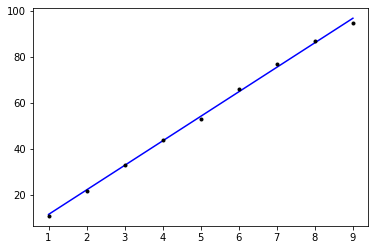

In [29]:
plt.plot(X, model.predict(X), 'b', X, y, 'k.')

- 위의 그래프에서 각 점은 우리가 실제 주었던 실제값에 해당되며, 직선은 실제값으로부터 오차를 최소화하는 w와 b의 값을 가지는 직선.
- 이 직선을 통해 9시간 30분을 공부하였을 때의 시험 성적을 예측.

In [30]:
print(model.predict([9.5]))

[[102.20111]]
